In [1]:
# Pre-processing

In [2]:
# Load dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('PurchasesFINAL12312016.csv')
data.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB


In [5]:
# Change Dtype

In [6]:
df = data.copy()

In [7]:
pd.to_datetime(df['PODate'])

0         2015-12-21
1         2015-12-22
2         2015-12-22
3         2015-12-22
4         2015-12-24
             ...    
2372469   2016-12-19
2372470   2016-12-19
2372471   2016-12-19
2372472   2016-12-19
2372473   2016-12-19
Name: PODate, Length: 2372474, dtype: datetime64[ns]

In [8]:
# Change to DateTime
# Multiple columns: Apply pd.to_datetime to each column in the list

In [9]:
date_col = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']
df[date_col] = df[date_col].apply(pd.to_datetime)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           int64         
 2   Brand           int64         
 3   Description     object        
 4   Size            object        
 5   VendorNumber    int64         
 6   VendorName      object        
 7   PONumber        int64         
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  int64         
dtypes: datetime64[ns](4), float64(2), int64(6), object(4)
memory usage: 289.6+ MB


In [11]:
# Change to Str

In [12]:
str_col = ['Store', 'Brand', 'VendorNumber', 'PONumber', 'Classification']
df[str_col] = df[str_col].astype(str)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           object        
 2   Brand           object        
 3   Description     object        
 4   Size            object        
 5   VendorNumber    object        
 6   VendorName      object        
 7   PONumber        object        
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  object        
dtypes: datetime64[ns](4), float64(2), int64(1), object(9)
memory usage: 289.6+ MB


In [14]:
# Feature Engineering

In [15]:
#  1. Lead Time(상품 생산 시작부터 완성까지 걸리는 시간)
# Lead Time = Invoice Date - PO Delivery Date
# Change Dtypes: Timedelta -> integer

In [16]:
(df['InvoiceDate'] - df['ReceivingDate']).dt.days

0           2
1           6
2           5
3           6
4           7
           ..
2372469    12
2372470    13
2372471    14
2372472    14
2372473    12
Length: 2372474, dtype: int64

In [17]:
# Change Dtypes: Timedelta -> integer
df['LeadTime'] = (df['InvoiceDate'] - df['ReceivingDate']).dt.days

In [18]:
df[['InvoiceDate', 'ReceivingDate', 'LeadTime']].head()

,InvoiceDate,ReceivingDate,LeadTime
0,2016-01-04,2016-01-02,2
1,2016-01-07,2016-01-01,6
2,2016-01-07,2016-01-02,5
3,2016-01-07,2016-01-01,6
4,2016-01-09,2016-01-02,7


In [19]:
df['LeadTime'].describe()

count    2.372474e+06
mean     8.872578e+00
std      2.975602e+00
min      1.000000e+00
25%      7.000000e+00
50%      9.000000e+00
75%      1.100000e+01
max      1.500000e+01
Name: LeadTime, dtype: float64

In [20]:
#  2. Order TIme(Lead TIme)
# Order Time(Lead Time) = PO Delivery Date - Purchase Date
# Change Dtypes: Timedelta -> integer: dt.days

In [21]:
df['OrderTime'] = (df['ReceivingDate'] - df['PODate']).dt.days

In [22]:
df[['PODate', 'ReceivingDate', 'OrderTime']].head()

,PODate,ReceivingDate,OrderTime
0,2015-12-21,2016-01-02,12
1,2015-12-22,2016-01-01,10
2,2015-12-22,2016-01-02,11
3,2015-12-22,2016-01-01,10
4,2015-12-24,2016-01-02,9


In [23]:
df['OrderTime'].describe()

count    2.372474e+06
mean     7.620739e+00
std      2.208890e+00
min      3.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.400000e+01
Name: OrderTime, dtype: float64

In [24]:
# """Red Flags: Invoice Issued Before Delivery: If the invoice date is earlier than the delivery date, this could be a data entry error or indicate that the invoice was issude prematurely(before goods/services were delivered), which could be a red flag for some businesses"""
# ""적색 신호: 배송 전에 발행된 송장: 송장 날짜가 배송 날짜보다 빠른 경우, 이는 데이터 입력 오류이거나 송장이 너무 일찍 발행되었음을 나타내거나(상품/서비스가 배송되기 전에) 일부 비즈니스에 위험 신호가 될 수 있습니다.""""

In [25]:
((df['InvoiceDate'] - df['ReceivingDate']) < pd.Timedelta(0)).value_counts() 

False    2372474
Name: count, dtype: int64

In [26]:
# 3. Payment Lead Time
# Payment Lead Time = PayDate - InvoiceDate
# Change Dtypes: Timedelta -> integer: dt.days

In [27]:
df['PaymentLT'] = (df['PayDate'] - df['InvoiceDate']).dt.days

In [28]:
df['PaymentLT'].describe()

count    2.372474e+06
mean     3.565881e+01
std      6.062932e+00
min      2.300000e+01
25%      3.100000e+01
50%      3.600000e+01
75%      4.100000e+01
max      4.800000e+01
Name: PaymentLT, dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 19 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           object        
 2   Brand           object        
 3   Description     object        
 4   Size            object        
 5   VendorNumber    object        
 6   VendorName      object        
 7   PONumber        object        
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  object        
 16  LeadTime        int64         
 17  OrderTime       int64         
 18  PaymentLT       int64         
dtypes: datetime64[ns](4), float64(2), int64(4), object(9)
memory usage: 343.9+ MB


In [30]:
# Text Split - Inventory ID

In [31]:
# Split by '_'
#### Split by '_' and expand into separate columns
df['InventoryId'].str.split('_', expand = True)

,0,1,2
0,69,MOUNTMEND,8412
1,30,CULCHETH,5255
2,34,PITMERDEN,5215
3,1,HARDERSFIELD,5255
4,76,DONCASTER,2034
...,...,...,...
2372469,49,GARIGILL,22298
2372470,1,HARDERSFIELD,19556
2372471,66,EANVERNESS,22297
2372472,69,MOUNTMEND,19557


In [32]:
df[['Split_1', 'InventoryCategory', 'Split_3']] = df['InventoryId'].str.split('_', expand = True)

In [33]:
df.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,...,PurchasePrice,Quantity,Dollars,Classification,LeadTime,OrderTime,PaymentLT,Split_1,InventoryCategory,Split_3
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,...,35.71,6,214.26,1,2,12,43,69,MOUNTMEND,8412
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,...,9.35,4,37.40,1,6,10,45,30,CULCHETH,5255
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,...,9.41,5,47.05,1,5,11,45,34,PITMERDEN,5215
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,...,9.35,6,56.10,1,6,10,45,1,HARDERSFIELD,5255
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,...,21.32,5,106.60,1,7,9,38,76,DONCASTER,2034


In [34]:
# Drop columns

df = df.drop(columns = ['Split_1', 'Split_3'])

In [35]:
df.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification',
       'LeadTime', 'OrderTime', 'PaymentLT', 'InventoryCategory'],
      dtype='object')

In [36]:
df['InventoryCategory'].value_counts()

InventoryCategory
DONCASTER       217917
MOUNTMEND       182223
EANVERNESS      166601
GOULCREST       132805
HORNSEY         100801
                 ...  
LEWES             6666
AYLESBURY         5379
TYWARDREATH       4087
KNIFE'S EDGE      3974
                  1726
Name: count, Length: 69, dtype: int64

In [37]:
# Check Null Value

In [38]:
df['InventoryCategory'].isna().value_counts()

InventoryCategory
False    2372474
Name: count, dtype: int64

In [39]:
# Check '' value
(df['InventoryCategory'] == '').value_counts()

InventoryCategory
False    2370748
True        1726
Name: count, dtype: int64

In [40]:
df[df['InventoryCategory'] == ''][['InventoryId', 'InventoryCategory']]

,InventoryId,InventoryCategory
983466,46__5255,
983474,46__5215,
983510,46__3472,
983534,46__4075,
983559,46__4179,
...,...,...
1544209,81__23289,
1544249,81__23325,
1544319,81__23286,
1544402,81__23324,


In [41]:
# Drop '' empty string value

In [42]:
df1 = df.copy()

In [43]:
# Drop df['InventoryCategory'] == ''; empty string

df1 = df[df['InventoryCategory'] != '']

In [44]:
print(df.shape, df1.shape)

(2372474, 20) (2370748, 20)


In [45]:
df1.select_dtypes(include = [float, int])

,PurchasePrice,Quantity,Dollars,LeadTime,OrderTime,PaymentLT
0,35.71,6,214.26,2,12,43
1,9.35,4,37.40,6,10,45
2,9.41,5,47.05,5,11,45
3,9.35,6,56.10,6,10,45
4,21.32,5,106.60,7,9,38
...,...,...,...,...,...,...
2372469,8.06,12,96.72,12,9,28
2372470,9.39,12,112.68,13,8,28
2372471,6.75,12,81.00,14,7,28
2372472,9.39,12,112.68,14,7,28


In [46]:
# Numerical features / Categorical features / Date features

In [47]:
df1.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification',
       'LeadTime', 'OrderTime', 'PaymentLT', 'InventoryCategory'],
      dtype='object')

In [48]:
df1.select_dtypes(include = ['datetime']).columns.to_list()

['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']

In [49]:
numerical_features = df1.select_dtypes(include = [float, int]).columns.to_list()
date_features = df1.select_dtypes(include = ['datetime']).columns.to_list()
categorical_features = df1.columns.difference(numerical_features + date_features).to_list()

print(numerical_features)
print(date_features)
print(categorical_features)

['PurchasePrice', 'Quantity', 'Dollars', 'LeadTime', 'OrderTime', 'PaymentLT']
['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']
['Brand', 'Classification', 'Description', 'InventoryCategory', 'InventoryId', 'PONumber', 'Size', 'Store', 'VendorName', 'VendorNumber']


In [50]:
# Check columns

print(len(numerical_features + date_features + categorical_features))
print(len(df1.columns))

20
20


In [51]:
df.head(10)

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,LeadTime,OrderTime,PaymentLT,InventoryCategory
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,2,12,43,MOUNTMEND
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,6,10,45,CULCHETH
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,5,11,45,PITMERDEN
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,6,10,45,HARDERSFIELD
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,7,9,38,DONCASTER
5,5_SUTTON_3348,5,3348,Bombay Sapphire Gin,1.75L,480,BACARDI USA INC,8106,2015-12-20,2016-01-02,2016-01-12,2016-02-05,22.38,6,134.28,1,10,13,24,SUTTON
6,1_HARDERSFIELD_8358,1,8358,Bacardi 151 Proof,750mL,480,BACARDI USA INC,8106,2015-12-20,2016-01-01,2016-01-12,2016-02-05,14.49,12,173.88,1,11,12,24,HARDERSFIELD
7,30_CULCHETH_4903,30,4903,Bacardi Superior Rum,200mL,480,BACARDI USA INC,8106,2015-12-20,2016-01-01,2016-01-12,2016-02-05,2.87,48,137.76,1,11,12,24,CULCHETH
8,34_PITMERDEN_3782,34,3782,Grey Goose Le Citron Vodka,750mL,480,BACARDI USA INC,8106,2015-12-20,2016-01-02,2016-01-12,2016-02-05,18.89,5,94.45,1,10,13,24,PITMERDEN
9,1_HARDERSFIELD_4233,1,4233,Castillo Silver Label Rum,1.75L,480,BACARDI USA INC,8106,2015-12-20,2016-01-01,2016-01-12,2016-02-05,7.87,23,181.01,1,11,12,24,HARDERSFIELD


In [52]:
# EDA

In [53]:
# Order processing by store: Take a look at the order processing time by store
# Visualization: Bar chart of average OrderTime by Store.

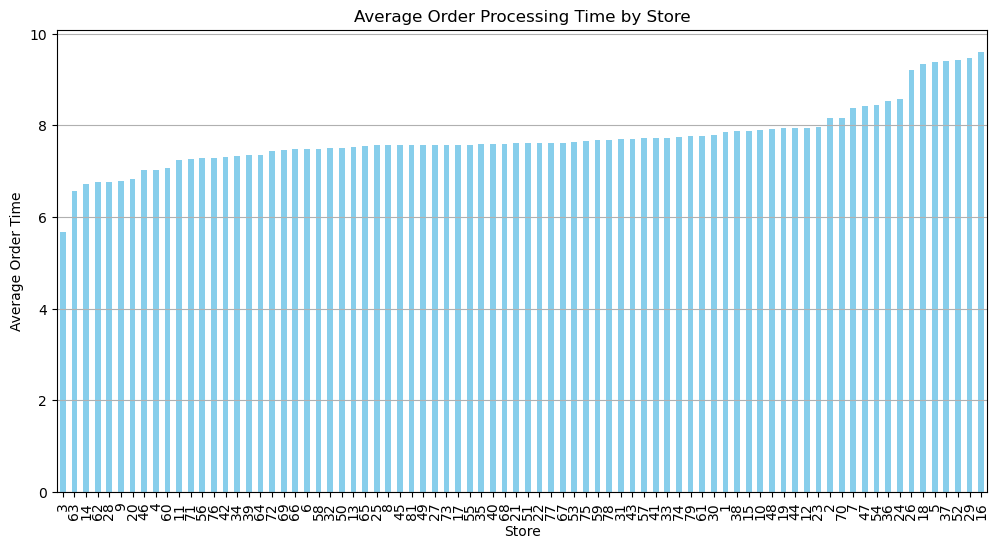

In [54]:
# 각 매장별 평균 주문 처리 시간 계산
average_order_time = df.groupby('Store')['OrderTime'].mean()

# 평균 주문 처리 시간을 내림차순으로 정렬
sorted_order_time = average_order_time.sort_values(ascending=True)

# 바 차트 그리기
plt.figure(figsize=(12, 6))
sorted_order_time.plot(kind='bar', color='skyblue')
plt.title('Average Order Processing Time by Store')
plt.xlabel('Store')
plt.ylabel('Average Order Time')
plt.grid(axis='y')  # y축에 그리드 추가
plt.show()

In [55]:
# Lead Time by Store: Compare lead times to see which stores are more efficient.
# Visualization: Box plot of LeadTime by Store.

<Figure size 1e+07x2000 with 0 Axes>

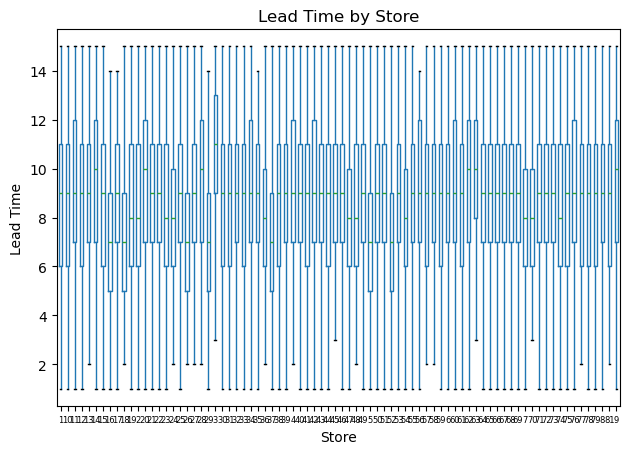

In [56]:
# 매장별 리드 타임

# 박스 플롯 그리기
plt.figure(figsize=(100000, 20))
df.boxplot(column='LeadTime', by='Store', grid=False)
plt.title('Lead Time by Store')
plt.suptitle('')  # 기본 제목 제거
plt.xlabel('Store')
plt.ylabel('Lead Time')
plt.xticks(fontsize=6) 
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [57]:
# 고유한 매장 이름을 추출하고 그 개수 세기
unique_stores = df['Store'].nunique()

print(f"Unique number of stores: {unique_stores}")

Unique number of stores: 80


<Figure size 1200x600 with 0 Axes>

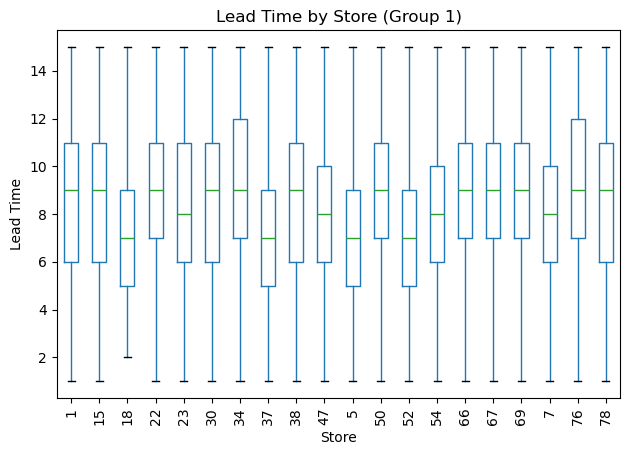

<Figure size 1200x600 with 0 Axes>

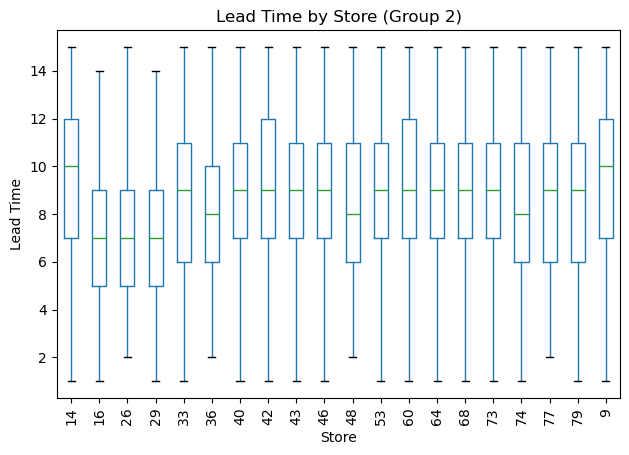

<Figure size 1200x600 with 0 Axes>

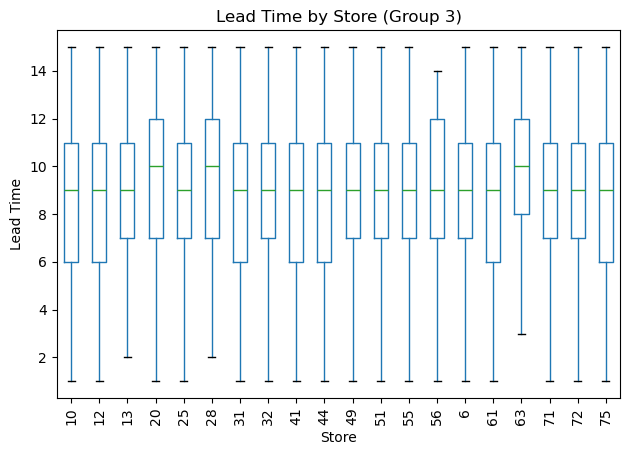

<Figure size 1200x600 with 0 Axes>

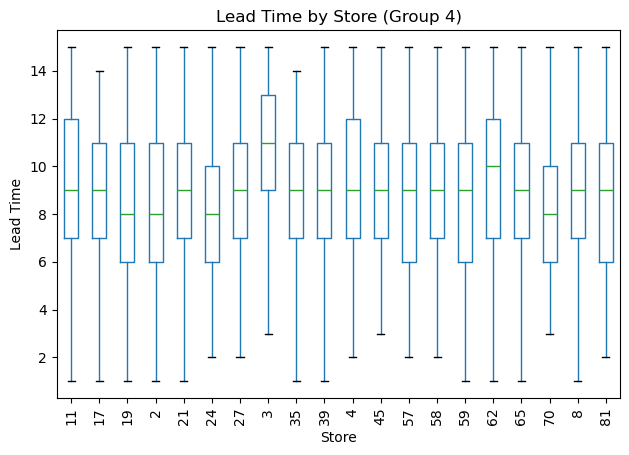

In [65]:
# 고유한 매장 리스트 가져오기
unique_stores = df['Store'].unique()

# 매장을 20개씩 나누어 4개의 그룹 생성
groups = [unique_stores[i:i + 20] for i in range(0, len(unique_stores), 20)]

# 각 그룹에 대해 박스 플롯 그리기
for i, group in enumerate(groups):
    plt.figure(figsize=(12, 6))  # 그래프 크기 조정
    df[df['Store'].isin(group)].boxplot(column='LeadTime', by='Store', grid=False)
    plt.title(f'Lead Time by Store (Group {i + 1})')
    plt.suptitle('')  # 기본 제목 제거
    plt.xlabel('Store')
    plt.ylabel('Lead Time')
    plt.xticks(rotation=90, fontsize=10)  # x축 레이블 회전 및 글자 크기 조정
    plt.tight_layout()  # 레이아웃 조정
    plt.show()  # 그래프 출력

In [61]:
# Order Time vs Lead Time: Analyze if there’s a pattern between order time and lead time.
# Visualization: Scatter plot of OrderTime vs LeadTime.

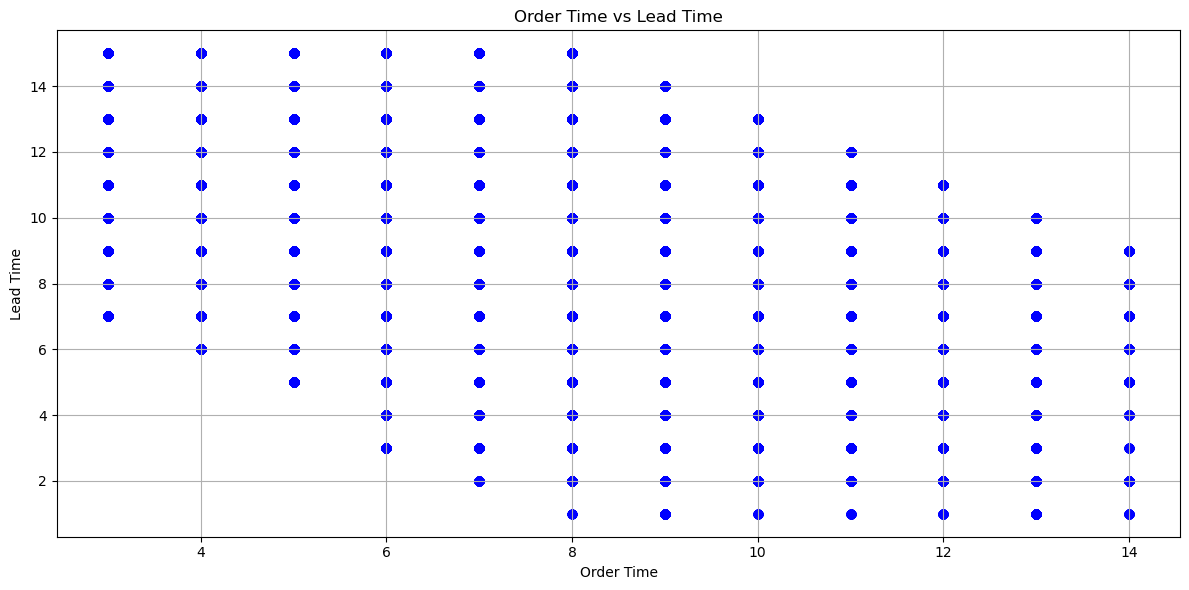

In [62]:
# 주문시간 vs 리드타임

# 산점도 그리기
plt.figure(figsize=(12, 6))
plt.scatter(df['OrderTime'], df['LeadTime'], alpha=0.5, color='blue')
plt.title('Order Time vs Lead Time')
plt.xlabel('Order Time')
plt.ylabel('Lead Time')
plt.grid(True)  # 그리드 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [63]:
# Lead Time Over Time: Track how lead time has evolved over time.
# Visualization: Line chart of PODate vs LeadTime.

C:\Users\wkdal\AppData\Local\Temp\ipykernel_21124\251730126.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  average_lead_time = df.resample('M', on='PODate')['LeadTime'].mean().reset_index()


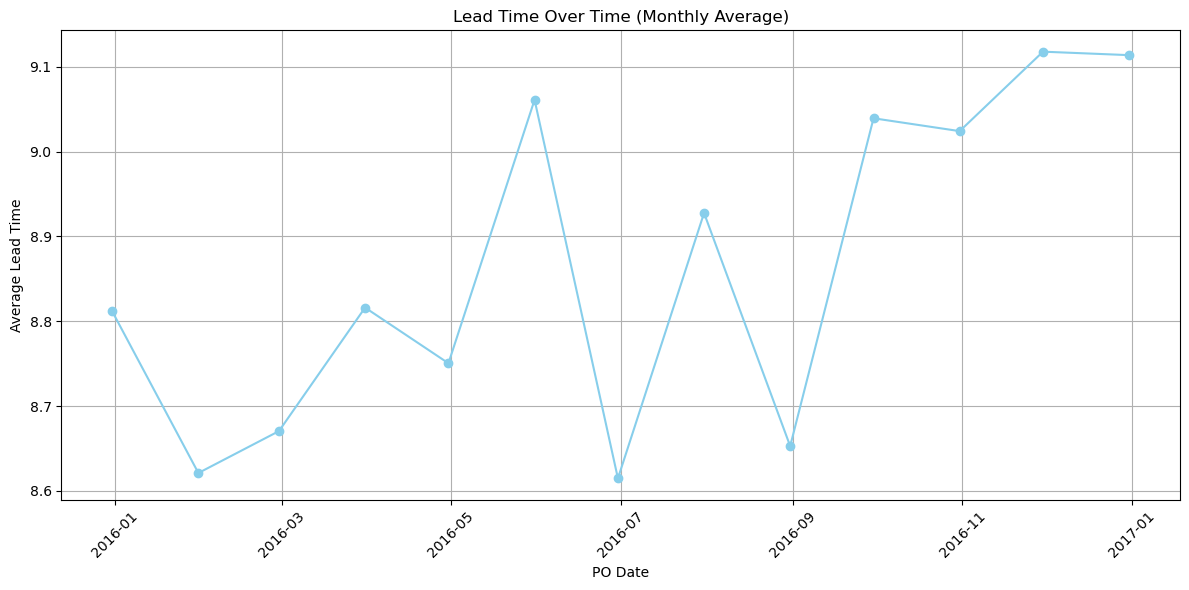

In [64]:
# PODate를 datetime 형식으로 변환
df['PODate'] = pd.to_datetime(df['PODate'])

# 월별 평균 리드 타임 계산
average_lead_time = df.resample('M', on='PODate')['LeadTime'].mean().reset_index()

# 선 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(average_lead_time['PODate'], average_lead_time['LeadTime'], marker='o', linestyle='-', color='skyblue')
plt.title('Lead Time Over Time (Monthly Average)')
plt.xlabel('PO Date')
plt.ylabel('Average Lead Time')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)  # 그리드 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()